In [1]:
import numpy as np
import math
pi = np.pi

from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

sim = Aer.get_backend("aer_simulator")

token = "d4bd6d08fbbed63644b122f31f0f54ee6d5bf83c5e6b6deef27b52029fef282afd802a830e344e81d9de4a4c2ba7f90e8aeb4606eda6ee3688a9a594d58b5aa8"
IBMQ.save_account(token, overwrite=True)
provider = IBMQ.load_account()

In [2]:
def qft_rotations(circuit, n):
    if n == 0:
        return
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi / 2 ** (n - qubit), qubit, n)
    qft_rotations(circuit, n)

In [3]:
def swap_registers(circuit, n):
    for qubit in range(n // 2):
        circuit.swap(qubit, n - qubit - 1)

In [4]:
def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)

/home/xuan/.local/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


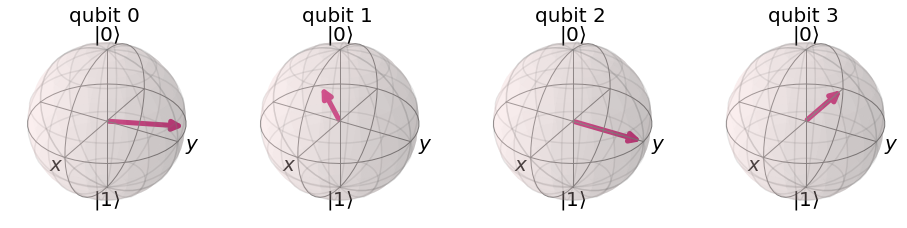

In [5]:
qc = QuantumCircuit(4)

qc.x(0)
qc.x(2)
qc.draw()

qft(qc, 4)
qc.draw()

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [74]:
def inverse_qft(circuit, n):
    qft_circ = QuantumCircuit(n)
    qft(qft_circ, n)
    invqft_circ = qft_circ.inverse()
    circuit.append(invqft_circ, circuit.qubits[:n])
    # return circuit
    return circuit.decompose()

# A. Quantum Fourier Transform (QFT)

## i. $\left|j = 1001\right\rangle$

In [7]:
qc = QuantumCircuit(4)

qc.x(0)
qc.x(3)

qft(qc, 4)
qc.draw()

┌───┐                                                                     »
q_0: ┤ X ├──────■───────────────────────────────■──────────────────────■───────»
     └───┘      │                               │                ┌───┐ │P(π/2) »
q_1: ───────────┼────────■──────────────────────┼────────■───────┤ H ├─■───────»
                │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘         »
q_2: ───────────┼────────┼────────■───────┤ H ├─■────────■─────────────────────»
     ┌───┐┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                »
q_3: ┤ X ├┤ H ├─■────────■────────■────────────────────────────────────────────»
     └───┘└───┘                                                                »
«     ┌───┐   
«q_0: ┤ H ├─X─
«     └───┘ │ 
«q_1: ──X───┼─
«       │   │ 
«q_2: ──X───┼─
«           │ 
«q_3: ──────X─
«

/home/xuan/.local/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


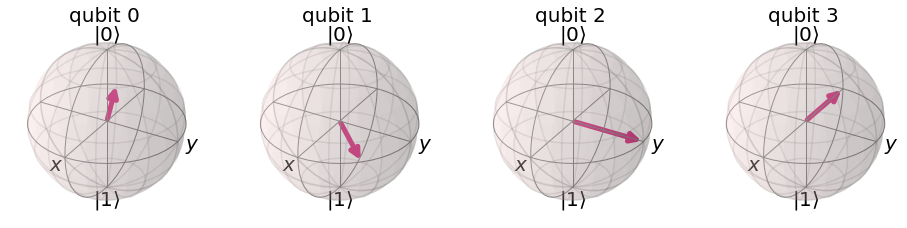

In [8]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

## ii. $\left|j = 101\right\rangle$

In [9]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(2)

qft(qc, 3)
qc.draw()

┌───┐                                     ┌───┐   
q_0: ┤ X ├──────■──────────────────────■───────┤ H ├─X─
     └───┘      │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ───────────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
     └───┘└───┘

/home/xuan/.local/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


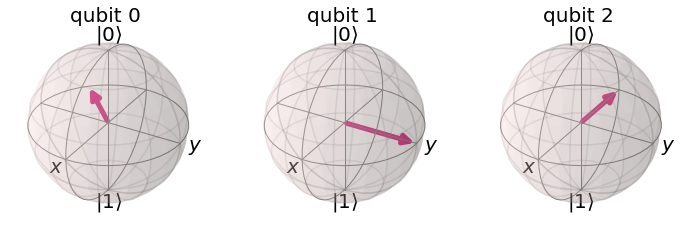

In [10]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(2)

qft(qc, 3)

In [ ]:
job    = execute(qc, provider.get_backend('ibmq_santiago'), shot = 1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

# B. Inverse QFT

## i. $\left|5\right\rangle$

In [75]:
qc = QuantumCircuit(3, 3)

qc.x(0)
qc.x(2)

qft(qc, 3)
qc.draw()

┌───┐                                     ┌───┐   
q_0: ┤ X ├──────■──────────────────────■───────┤ H ├─X─
     └───┘      │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ───────────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
     └───┘└───┘                                        
c: 3/══════════════════════════════════════════════════

In [76]:
qc = inverse_qft(qc, 3)
qc.draw()

┌───────────┐ ┌────────┐                     ┌────────┐                »
q_0: ┤ U3(π,0,π) ├─┤ P(π/8) ├──■───────────────■──┤ P(π/4) ├────────────────»
     └─┬────────┬┘ └────────┘  │               │  └────────┘                »
q_1: ──┤ P(π/4) ├──────────────┼───────────────┼──────────────■─────────────»
     ┌─┴────────┴┐┌─────────┐┌─┴─┐┌─────────┐┌─┴─┐┌────────┐┌─┴─┐┌─────────┐»
q_2: ┤ U3(π,0,π) ├┤ U2(0,π) ├┤ X ├┤ P(-π/8) ├┤ X ├┤ P(π/8) ├┤ X ├┤ P(-π/4) ├»
     └───────────┘└─────────┘└───┘└─────────┘└───┘└────────┘└───┘└─────────┘»
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                          ┌─────────┐     ┌───┐        ┌───┐»
«q_0: ──────────────────■───────────────■──┤ U2(0,π) ├──■──┤ X ├──■───X─┤ H ├»
«          ┌─────────┐┌─┴─┐┌─────────┐┌─┴─┐└┬────────┤  │  └─┬─┘  │   │ └───┘»
«q_1: ──■──┤ U2(0,π) ├┤ X ├┤ P(-π/4) ├┤ X ├─┤ P(π/4) ├──┼────┼────┼───┼──────»
«     ┌─┴─┐└┬────────┤└───┘└─────────┘└───┘ └────────┘┌─┴─┐  │  ┌─┴─┐ │      »
«q_2: ┤ X ├─┤ P(π/4) ├────────────────────────────────┤ X ├──■──┤ X ├─X──────»
«     └───┘ └────────┘                                └───┘     └───┘        »
«c: 3/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                             
«q_0: ─■────────────────────────■─────────────
«      │P(-π/2) ┌───┐           │             
«q_1: ─■────────┤ H ├─■─────────┼─────────────
«               └───┘ │P(-π/2)  │P(-π/4) ┌───┐
«q_2: ────────────────■─────────■────────┤ H ├
«                                        └───┘
«c: 3/════════════════════════════════════════
«

In [68]:
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.draw()

CircuitError: 'Index out of range.'

/home/xuan/.local/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


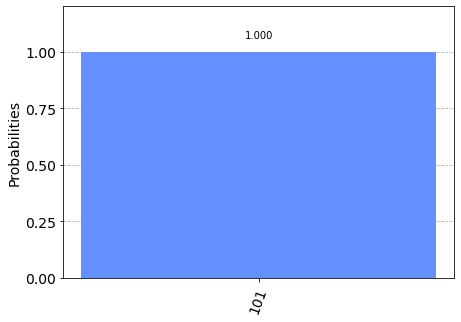

In [39]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

In [43]:
qc = QuantumCircuit(5, 5)

for i in range(5):
    qc.h(i)
    
inverse_qft(qc, 5)

for i in range(5):
    qc.measure(i, i)

qc.draw()

┌───┐┌─────────────────┐┌─┐            
q_0: ┤ H ├┤0                ├┤M├────────────
     ├───┤│                 │└╥┘┌─┐         
q_1: ┤ H ├┤1                ├─╫─┤M├─────────
     ├───┤│                 │ ║ └╥┘┌─┐      
q_2: ┤ H ├┤2 circuit-540_dg ├─╫──╫─┤M├──────
     ├───┤│                 │ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├┤3                ├─╫──╫──╫─┤M├───
     ├───┤│                 │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├┤4                ├─╫──╫──╫──╫─┤M├
     └───┘└─────────────────┘ ║  ║  ║  ║ └╥┘
c: 5/═════════════════════════╩══╩══╩══╩══╩═
                              0  1  2  3  4

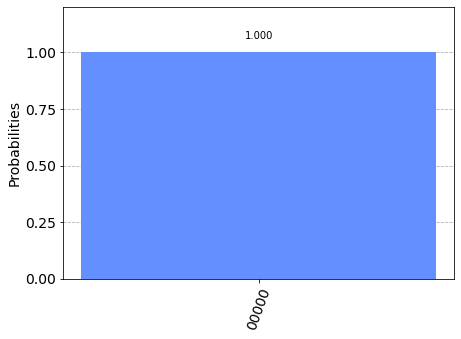

In [44]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()


plot_histogram(counts)

# C. Quantum Phase Estimate (QPE)

In [48]:
def qpe_0666(n):
    qc = QuantumCircuit(n + 1, n)

    for i in range(n):
        qc.h(i)
    qc.x(n)

    repetitions = 1
    for counting_qubit in range(n):
        qc.cp(pi * .666666666666666 * repetitions, counting_qubit, n)
        repetitions *= 2
    
    inverse_qft(qc, n)

    for i in range(n):
        qc.measure(i, i)
    return qc

In [50]:
qc = qpe_0666(3)
qc.draw()

┌───┐                              ┌─────────────────┐┌─┐      
q_0: ┤ H ├─■────────────────────────────┤0                ├┤M├──────
     ├───┤ │                            │                 │└╥┘┌─┐   
q_1: ┤ H ├─┼─────────■──────────────────┤1 circuit-863_dg ├─╫─┤M├───
     ├───┤ │         │                  │                 │ ║ └╥┘┌─┐
q_2: ┤ H ├─┼─────────┼─────────■────────┤2                ├─╫──╫─┤M├
     ├───┤ │P(2π/3)  │P(4π/3)  │P(8π/3) └─────────────────┘ ║  ║ └╥┘
q_3: ┤ X ├─■─────────■─────────■────────────────────────────╫──╫──╫─
     └───┘                                                  ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════╩══╩══╩═
                                                            0  1  2

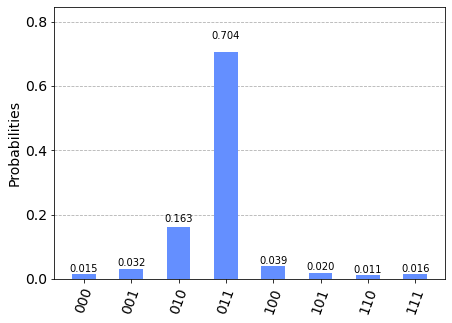

In [51]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

In [52]:
qc = qpe_0666(5)
qc.draw()

┌───┐                                                    »
q_0: ┤ H ├─■──────────────────────────────────────────────────»
     ├───┤ │                                                  »
q_1: ┤ H ├─┼─────────■────────────────────────────────────────»
     ├───┤ │         │                                        »
q_2: ┤ H ├─┼─────────┼─────────■──────────────────────────────»
     ├───┤ │         │         │                              »
q_3: ┤ H ├─┼─────────┼─────────┼─────────■────────────────────»
     ├───┤ │         │         │         │                    »
q_4: ┤ H ├─┼─────────┼─────────┼─────────┼──────────■─────────»
     ├───┤ │P(2π/3)  │P(4π/3)  │P(8π/3)  │P(16π/3)  │P(33.51) »
q_5: ┤ X ├─■─────────■─────────■─────────■──────────■─────────»
     └───┘                                                    »
c: 5/═════════════════════════════════════════════════════════»
                                                              »
«     ┌─────────────────┐┌─┐            
«q_0: ┤0                ├┤M├────────────
«     │                 │└╥┘┌─┐         
«q_1: ┤1                ├─╫─┤M├─────────
«     │                 │ ║ └╥┘┌─┐      
«q_2: ┤2 circuit-995_dg ├─╫──╫─┤M├──────
«     │                 │ ║  ║ └╥┘┌─┐   
«q_3: ┤3                ├─╫──╫──╫─┤M├───
«     │                 │ ║  ║  ║ └╥┘┌─┐
«q_4: ┤4                ├─╫──╫──╫──╫─┤M├
«     └─────────────────┘ ║  ║  ║  ║ └╥┘
«q_5: ────────────────────╫──╫──╫──╫──╫─
«                         ║  ║  ║  ║  ║ 
«c: 5/════════════════════╩══╩══╩══╩══╩═
«                         0  1  2  3  4

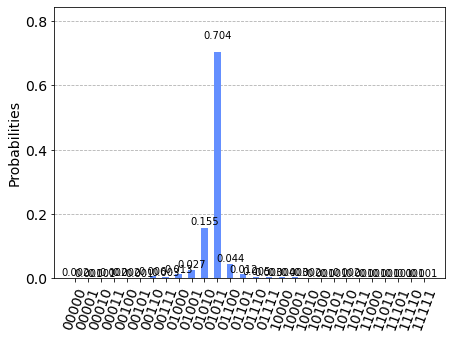

In [53]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

In [54]:
qc = qpe_0666(7)
qc.draw()

┌───┐                                                                »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────»
     ├───┤ │                                                              »
q_1: ┤ H ├─┼─────────■────────────────────────────────────────────────────»
     ├───┤ │         │                                                    »
q_2: ┤ H ├─┼─────────┼─────────■──────────────────────────────────────────»
     ├───┤ │         │         │                                          »
q_3: ┤ H ├─┼─────────┼─────────┼─────────■────────────────────────────────»
     ├───┤ │         │         │         │                                »
q_4: ┤ H ├─┼─────────┼─────────┼─────────┼──────────■─────────────────────»
     ├───┤ │         │         │         │          │                     »
q_5: ┤ H ├─┼─────────┼─────────┼─────────┼──────────┼──────────■──────────»
     ├───┤ │         │         │         │          │          │          »
q_6: ┤ H ├─┼─────────┼─────────┼─────────┼──────────┼──────────┼──────────»
     ├───┤ │P(2π/3)  │P(4π/3)  │P(8π/3)  │P(16π/3)  │P(33.51)  │P(67.021) »
q_7: ┤ X ├─■─────────■─────────■─────────■──────────■──────────■──────────»
     └───┘                                                                »
c: 7/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                 ┌──────────────────┐┌─┐                  
«q_0: ────────────┤0                 ├┤M├──────────────────
«                 │                  │└╥┘┌─┐               
«q_1: ────────────┤1                 ├─╫─┤M├───────────────
«                 │                  │ ║ └╥┘┌─┐            
«q_2: ────────────┤2                 ├─╫──╫─┤M├────────────
«                 │                  │ ║  ║ └╥┘┌─┐         
«q_3: ────────────┤3 circuit-1199_dg ├─╫──╫──╫─┤M├─────────
«                 │                  │ ║  ║  ║ └╥┘┌─┐      
«q_4: ────────────┤4                 ├─╫──╫──╫──╫─┤M├──────
«                 │                  │ ║  ║  ║  ║ └╥┘┌─┐   
«q_5: ────────────┤5                 ├─╫──╫──╫──╫──╫─┤M├───
«                 │                  │ ║  ║  ║  ║  ║ └╥┘┌─┐
«q_6: ─■──────────┤6                 ├─╫──╫──╫──╫──╫──╫─┤M├
«      │P(134.04) └──────────────────┘ ║  ║  ║  ║  ║  ║ └╥┘
«q_7: ─■───────────────────────────────╫──╫──╫──╫──╫──╫──╫─
«                                      ║  ║  ║  ║  ║  ║  ║ 
«c: 7/═════════════════════════════════╩══╩══╩══╩══╩══╩══╩═
«                                      0  1  2  3  4  5  6

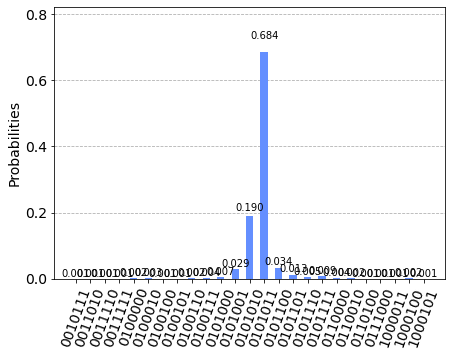

In [55]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

In [62]:
n = 1

qc = QuantumCircuit(n + 1, n)

for i in range(n):
    qc.h(i)

repetitions = 1
for counting_qubit in range(n):
    for _ in range(repetitions):
        qc.ch(counting_qubit, n)
    repetitions *= 2
    
inverse_qft(qc, n)

for i in range(n):
    qc.measure(i, i)

qc.draw()

┌───┐     ┌─────────────────┐┌─┐
q_0: ┤ H ├──■──┤ circuit-2683_dg ├┤M├
     └───┘┌─┴─┐└─────────────────┘└╥┘
q_1: ─────┤ H ├────────────────────╫─
          └───┘                    ║ 
c: 1/══════════════════════════════╩═
                                   0

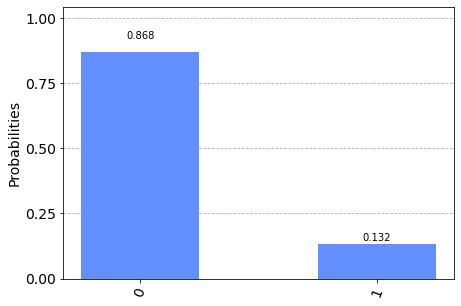

In [63]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

In [66]:
from numpy import linalg
h = np.array([[1, 1], [1, -1]]) / 1.414
linalg.eig(h)

(array([ 1.00015103, -1.00015103]),
 array([[ 0.92387953, -0.38268343],
        [ 0.38268343,  0.92387953]]))